<a href="https://colab.research.google.com/github/KimSeonHo-719/DRL/blob/main/MountainCar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gymnasium[box2d] numpy matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (box2d-py)


In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
env = gym.make('MountainCar-v0', render_mode=None)  # 렌더링은 Colab에서 불가능


In [4]:
n_position_bins = 20
n_velocity_bins = 20
pos_space = np.linspace(env.observation_space.low[0], env.observation_space.high[0], n_position_bins)
vel_space = np.linspace(env.observation_space.low[1], env.observation_space.high[1], n_velocity_bins)

def discretize(obs):
    pos, vel = obs
    pos_idx = np.digitize(pos, pos_space) - 1
    vel_idx = np.digitize(vel, vel_space) - 1
    return pos_idx, vel_idx

In [5]:
n_actions = env.action_space.n
q_table = np.zeros((n_position_bins, n_velocity_bins, n_actions))


In [6]:
alpha = 0.1           # 학습률
gamma = 0.99          # 할인율
epsilon = 1.0         # 초기 탐험률
epsilon_min = 0.01
epsilon_decay = 0.995
n_episodes = 5000
max_steps = 200


In [7]:
rewards_per_episode = []

for episode in range(n_episodes):
    obs, _ = env.reset(seed=episode)
    state = discretize(obs)
    total_reward = 0

    for step in range(max_steps):
        # ε-greedy 정책
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_obs, reward, terminated, truncated, _ = env.step(action)
        next_state = discretize(next_obs)
        total_reward += reward

        # Q-학습 업데이트
        best_next = np.max(q_table[next_state])
        q_table[state + (action,)] += alpha * (reward + gamma * best_next - q_table[state + (action,)])

        state = next_state

        if terminated or truncated:
            break

    # 탐험률 감소
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards_per_episode.append(total_reward)

    # 진행 상황 출력
    if (episode + 1) % 500 == 0:
        clear_output(wait=True)
        print(f'Episode: {episode+1}, Average Reward (last 100): {np.mean(rewards_per_episode[-100:]):.2f}')


Episode: 5000, Average Reward (last 100): -162.65


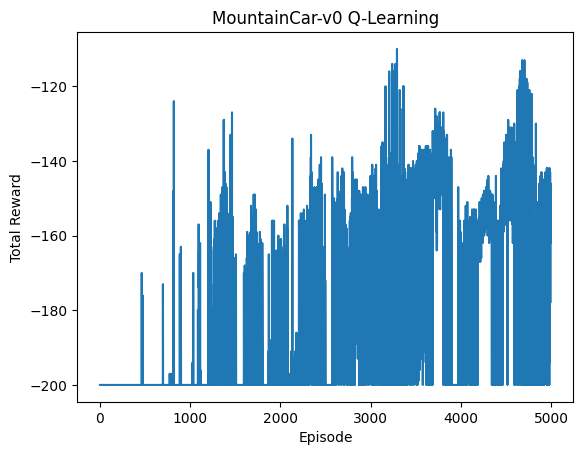

In [8]:
plt.plot(rewards_per_episode)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('MountainCar-v0 Q-Learning')
plt.show()

In [9]:
obs, _ = env.reset(seed=42)
state = discretize(obs)
for _ in range(max_steps):
    action = np.argmax(q_table[state])
    obs, _, terminated, truncated, _ = env.step(action)
    state = discretize(obs)
    if terminated or truncated:
        break
print("최종 위치:", obs[0])
env.close()

최종 위치: 0.5147299
